In [1]:
# credits : https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew, boxcox

In [83]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [84]:
#check the numbers of samples and features
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [85]:
#check again the data size after dropping the 'Id' variable
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [86]:
test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

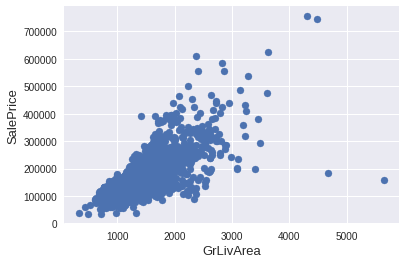

In [87]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice',fontsize=13)
plt.xlabel('GrLivArea',fontsize=13)

In [88]:
# Remove outliers from the dataset
remove_series = train[train['GrLivArea']>4000].index
remove_series

Int64Index([523, 691, 1182, 1298], dtype='int64')

In [89]:
 train.drop(remove_series,axis=0,inplace=True)

In [90]:
train.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig    ...     PoolArea PoolQC Fence  \
0         Lvl    AllPub    Inside    ...            0    NaN   NaN   
1         Lvl    AllPub       FR2    ...            0    NaN   NaN   
2         Lvl    AllPub    Inside    ...            0    NaN   NaN   
3         Lvl    AllPub    Corner    ...            0    NaN   NaN   
4         Lvl    AllPub       FR2    ...            0    NaN   NaN   

  MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0         NaN       0      2    2008        WD         Normal     208500  
1         NaN       0      5    2007        WD         Normal     181500  
2         NaN       0      9    2008        WD         Normal     223500  
3         NaN       0      2    2006        WD        Abnorml     140000  
4         NaN       0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

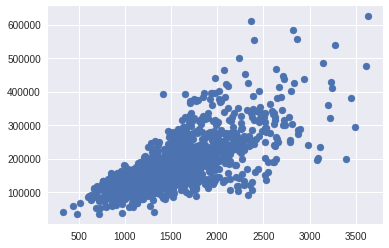

In [91]:
fig,ax = plt.subplots()
ax.scatter(train['GrLivArea'],train['SalePrice'])

mu = 180151.2335164835, sigma = 76670.24989058504


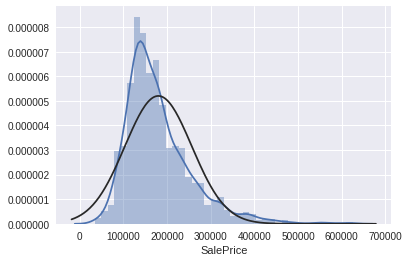

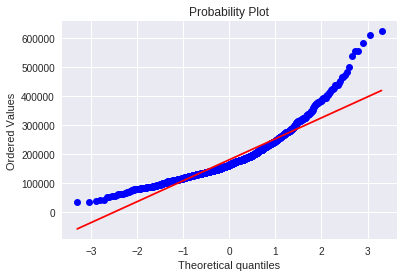

In [92]:
sns.distplot(a = train['SalePrice'],fit=norm)
# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print("mu = {}, sigma = {}".format(mu,sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

mu = 12.021949506725813, sigma = 0.3959412098902504


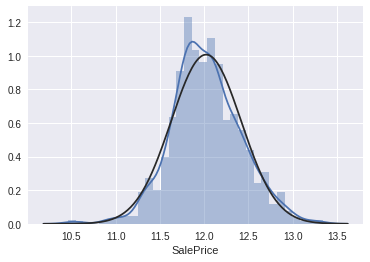

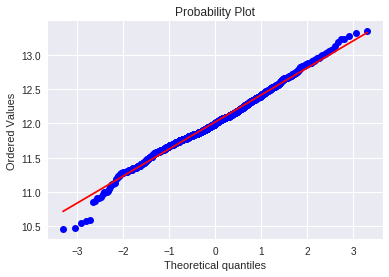

In [93]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
sns.distplot(np.log1p(train["SalePrice"]),fit=norm)
train["SalePrice"] = np.log1p(train["SalePrice"])
(mu, sigma) = norm.fit(train['SalePrice'])
print("mu = {}, sigma = {}".format(mu,sigma))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

# Feature Engineering

In [94]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
all_data = pd.concat([train, test]).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [95]:
all_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr BldgType BsmtCond  \
0       856       854          0   NaN             3     1Fam       TA   
1      1262         0          0   NaN             3     1Fam       TA   
2       920       866          0   NaN             3     1Fam       TA   
3       961       756          0   NaN             3     1Fam       Gd   
4      1145      1053          0   NaN             4     1Fam       TA   

  BsmtExposure  BsmtFinSF1  BsmtFinSF2  ...   SaleType ScreenPorch  Street  \
0           No       706.0         0.0  ...         WD           0    Pave   
1           Gd       978.0         0.0  ...         WD           0    Pave   
2           Mn       486.0         0.0  ...         WD           0    Pave   
3           No       216.0         0.0  ...         WD           0    Pave   
4           Av       655.0         0.0  ...         WD           0    Pave   

   TotRmsAbvGrd TotalBsmtSF  Utilities WoodDeckSF YearBuilt YearRemodAdd  \
0             8       856.0     AllPub          0      2003         2003   
1             6      1262.0     AllPub        298      1976         1976   
2             6       920.0     AllPub          0      2001         2002   
3             7       756.0     AllPub          0      1915         1970   
4             9      1145.0     AllPub        192      2000         2000   

  YrSold  
0   2008  
1   2007  
2   2008  
3   2006  
4   2008  

[5 rows x 79 columns]

In [96]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index)
missing_data = pd.DataFrame(all_data_na.sort_values(ascending=False),columns=['Missing Ratio']) 
missing_data.head(10)

Missing Ratio
PoolQC            99.725557
MiscFeature       96.397942
Alley             93.207547
Fence             80.445969
FireplaceQu       48.713551
LotFrontage       16.672384
GarageQual         5.454545
GarageCond         5.454545
GarageFinish       5.454545
GarageYrBlt        5.454545

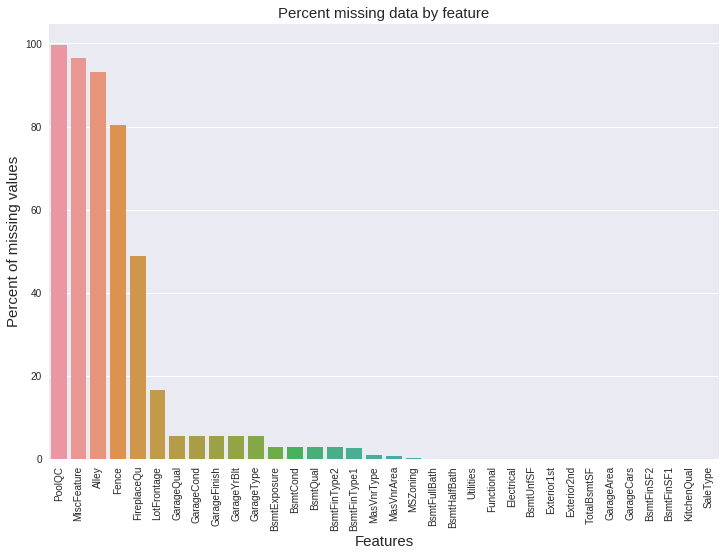

In [97]:
fig,ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation=90)
sns.barplot(x=missing_data.index,y=missing_data['Missing Ratio'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

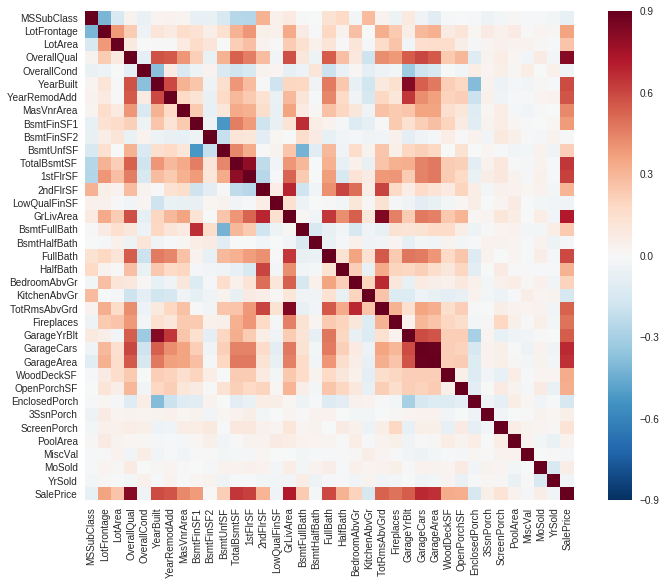

In [98]:
#Correlation map to see how features are correlated with SalePrice
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

Imputing missing values

In [99]:
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")

In [100]:
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")

In [101]:
all_data["Alley"] = all_data["Alley"].fillna("None")

In [102]:
all_data["Fence"] = all_data["Fence"].fillna("None")

In [103]:
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")

In [104]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [105]:
all_data["LotFrontage"] = all_data["LotFrontage"].fillna(all_data["LotFrontage"].median())

In [106]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')

In [107]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

In [108]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

In [109]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')

In [110]:
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

In [111]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [112]:
all_data['Utilities'].value_counts()

AllPub    2912
NoSeWa       1
Name: Utilities, dtype: int64

In [113]:
all_data.drop(['Utilities'],axis=1, inplace=True)

In [114]:
all_data["Functional"] = all_data["Functional"].fillna("Typ")

In [115]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [116]:
all_data['Electrical'].isnull().sum()

0

In [117]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [118]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

In [119]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [120]:
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [121]:
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()

Empty DataFrame
Columns: [Missing Ratio]
Index: []

In [122]:
#MSSubClass=The building class
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
all_data['OverallCond'] = all_data['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [123]:
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [124]:
from sklearn.preprocessing import LabelEncoder
# process columns, apply LabelEncoder to categorical features
for c in cols:
    le = LabelEncoder() 
    all_data[c] = le.fit_transform(list(all_data[c].values))
# shape        
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 78)


In [125]:
# Adding total sqfootage feature 
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [126]:
all_data.head()

1stFlrSF  2ndFlrSF  3SsnPorch  Alley  BedroomAbvGr BldgType  BsmtCond  \
0       856       854          0      1             3     1Fam         4   
1      1262         0          0      1             3     1Fam         4   
2       920       866          0      1             3     1Fam         4   
3       961       756          0      1             3     1Fam         1   
4      1145      1053          0      1             4     1Fam         4   

   BsmtExposure  BsmtFinSF1  BsmtFinSF2   ...    SaleType  ScreenPorch  \
0             3       706.0         0.0   ...          WD            0   
1             1       978.0         0.0   ...          WD            0   
2             2       486.0         0.0   ...          WD            0   
3             3       216.0         0.0   ...          WD            0   
4             0       655.0         0.0   ...          WD            0   

   Street  TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  YearBuilt YearRemodAdd  \
0       1             8        856.0           0       2003         2003   
1       1             6       1262.0         298       1976         1976   
2       1             6        920.0           0       2001         2002   
3       1             7        756.0           0       1915         1970   
4       1             9       1145.0         192       2000         2000   

  YrSold TotalSF  
0      2  2566.0  
1      1  2524.0  
2      2  2706.0  
3      0  2473.0  
4      2  3343.0  

[5 rows x 79 columns]

In [127]:
numeric_cols = all_data.dtypes[all_data.dtypes!='object'].index
skewed_feats = all_data[numeric_cols].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats>0.75].sort_values(ascending=False)
skewed_feats

MiscVal          21.932147
PoolArea         18.701829
LotArea          13.123758
LowQualFinSF     12.080315
3SsnPorch        11.368094
LandSlope         4.971350
KitchenAbvGr      4.298845
BsmtFinSF2        4.142863
EnclosedPorch     4.000796
ScreenPorch       3.943508
BsmtHalfBath      3.942892
MasVnrArea        2.600697
OpenPorchSF       2.529245
WoodDeckSF        1.848285
1stFlrSF          1.253011
LotFrontage       1.245296
GrLivArea         0.977860
BsmtFinSF1        0.974138
TotalSF           0.936173
BsmtUnfSF         0.920135
2ndFlrSF          0.843237
dtype: float64

In [128]:
print("There are {} skewed numerical features to Box Cox transform".format(skewed_feats.shape[0]))

There are 21 skewed numerical features to Box Cox transform


In [129]:
from scipy.special import boxcox1p
skewed_features = skewed_feats.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

In [130]:
all_data.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'PoolQC',

In [131]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2915, 220)

In [132]:
train = all_data[:ntrain]
test = all_data[ntrain:]

# Modeling

In [133]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [134]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [135]:
#Lasso Model
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0004, random_state=1))

In [136]:
# Elastic Net
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [137]:
# KernelRidge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [138]:
# Gradient Boost
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [139]:
# XGB
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1)



In [140]:
# lgb
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=25,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [141]:
score = rmsle_cv(lasso)
print("\nLasso error score : {:.4f} (+/-{:.4f})\n".format(score.mean(), score.std()))


Lasso error score : 0.1101 (+/-0.0070)



In [142]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} (+/-{:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.1101 (+/-0.0069)



In [143]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} (+/-{:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.2620 (+/-0.0150)



In [144]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} (+/-{:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.1175 (+/-0.0077)



In [145]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} (+/-{:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1192 (+/-0.0041)



In [146]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} (+/-{:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.1190 (+/-0.0062)



In [147]:
class AveragingModels(BaseEstimator):
    def __init__(self,models):
        self.models = models
    
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]

        for model in self.models_:
            model.fit(X,y)
        return self

    def predict(self, X):
            predictions = np.column_stack([
                model.predict(X) for model in self.models_
            ])
            return np.mean(predictions, axis=1)   

In [148]:
averaged_models = AveragingModels(models = (ENet, GBoost, model_xgb, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} (+/-{:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1088 (+/-0.0064)



In [ ]:
class StackingAveragingModels(BaseEstimator):
    def __init__(self,base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = KFold(n_splits=n_folds,shuffle=True)
        
        
    
        

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])